# **Разработка и обучение моделей**

In [ ]:
# Все библиотеки, необходимые для работы будут в этой ячейке
import numpy as np
import pandas as pd

# импорт matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset/Копия1 X_CLEAR.xlsx')
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
1,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
2,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
3,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,60.000000
4,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1,9.076380,47.019770
996,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1,10.565614,53.750790
997,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1,4.161154,67.629684
998,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1,6.313201,58.261074


Разделим задачу на три этапа:

*   **Модель для Модуля упругости при растяжении, ГПа**
*   **Модель для Прочности при растяжении, МПа**
*   **Модель для соотношения матрица-наполнитель**   






В данной части приводится список моделей, которые будут использоваться для прогноза модуля упругости при растяжении и прочности при растяжении. Используются несколько метрик для сравнения моделей. Для статистической устойчивости результатов подбираются коэффициенты кросс-валидации.

"При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10"

**Для определения нижней границы качества модели наиболее удобно использовать метрику MAE (Mean Absolute Error)**. MAE показывает среднюю абсолютную ошибку прогноза модели по всем наблюдениям. При этом ошибка прогноза не смещена ни в большую, ни в меньшую сторону и она не зависит от масштаба данных, что делает её удобной метрикой для оценки качества модели. MAE часто используется в задачах регрессии. 

В работе мы использовали **DummyRegressor с параметром "mean"**,  mean - предсказывает среднее значение целевой переменной, которое было вычислено на тренировочных данных.

Для удобства создадим вспомогательную функцию, которая будет **возвращать оценки для всех используемых моделей машинного обучения на заданном датасете**, полученные с помощью кросс-валидации.

Метрики будут использоваться для оценки моделей:
*   **r2** оценивает качество модели на осн. коэффициента детерминации;
*   **RMSE** - корень из среднеквадратичной ошибки;
*   **MAE** - средняя абсолютная ошибка;
*   **MAPE** - средняя абсолютная процентная ошибка между фактическими и прогнозируемыми значениями. Она используется для оценки точности модели в процентном выражении;
*   **max_error** (maximum error) вычисляется как максимальная абсолютная разница между фактическими и прогнозируемыми значениями. Она показывает наибольшую ошибку, допущенную моделью







In [ ]:
# random_state для псевдо-случайных повторений
RANDOM_STATE = 3022

In [ ]:
# оценки метрики для каждой модели с помощью ламбда-функции evaluate_models 

def evaluate_models (models, x, y):  # models - словарь моделей # x - матрица признаков 
                                                               # y - вектор целевой переменной                
    cv = KFold(10, shuffle=True, random_state = RANDOM_STATE)  # по условию задачи разбить на 10 фолдов           
# scor - названия метрик и соотв. названия функций из модуля sklearn.metrics для вычисления метрик
    scoring = {'R2': 'r2',                         # ключ-значение: название модели-модель 
               'RMSE': 'neg_root_mean_squared_error', 
               'MAE': 'neg_mean_absolute_error', 
               'MAPE': 'neg_mean_absolute_percentage_error', 
               'max_error': 'max_error'}
# df со статистикой по каждой модели:каждая строка = отдельная модель, столбцы содержат метрики для каждой модели         
    model_stats = pd.DataFrame.from_dict({model_name:  
                                    {score_name: np.mean(cross_val_score(model, x, y, cv=cv, scoring=score)) 
                                     for score_name, score in scoring.items()} 
                                    for model_name, model in models.items()})
    return model_stats

In [ ]:
# заготовим всп.функцию для поиска гиперпараметров по сетке с перекрёстной проверкой

def run_grids_params(model, params, x, y):
    pd.options.display.max_colwidth = 200
    model_stats = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE) # по условию задачи разбить на 10 фолдов
    
    scoring = 'neg_mean_absolute_error'
    searcher = GridSearchCV(model, params, cv=cv, scoring=scoring)
    searcher.fit(x, y)
    model_stats.loc[:, 'params'] = searcher.cv_results_['params']
    model_stats.loc[:, 'MAE'] = searcher.cv_results_['mean_test_score']
    model_stats.loc[:, 'rank'] = searcher.cv_results_['rank_test_score']
    return model_stats, searcher.best_estimator_

вспомогательная функция для вычисления метрик предсказания

In [ ]:
def modelget_metrics(model_name, y, y_pred):
    model_stats = pd.DataFrame()
    model_stats.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    model_stats.loc[model_name, 'RMSE'] = -metrics.mean_squared_error(y, y_pred, squared=False)
    model_stats.loc[model_name, 'MAE'] = -metrics.mean_absolute_error(y, y_pred)
    model_stats.loc[model_name, 'MAPE'] = -metrics.mean_absolute_percentage_error(y, y_pred)
    model_stats.loc[model_name, 'max_error'] = -metrics.max_error(y, y_pred)
    return model_stats

# **Модель для модуля упругости при растяжении, ГПа**

При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей.

In [ ]:
# выделяем предикторы и целевую переменную для Задачи 1
y1_columns = ['Модуль упругости при растяжении, ГПа']
x1_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [ ]:
y1 = df.loc[:, y1_columns]
x1 = df.loc[:, x1_columns]

In [ ]:
 # Разделяю на тренировочную и тестовую выборку
x1_train_raw, x1_test_raw, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=RANDOM_STATE)
print('x1_train:', x1_train_raw.shape, 'y1_train:', y1_train.shape)
print('x1_test:', x1_test_raw.shape, 'y1_test:', y1_test.shape)

x1_train: (700, 11) y1_train: (700, 1)
x1_test: (300, 11) y1_test: (300, 1)


In [ ]:
#двумерные массивы y_train и y_test принимают исходные значения
y1_train = y1_train['Модуль упругости при растяжении, ГПа'].values
y1_test = y1_test['Модуль упругости при растяжении, ГПа'].values

In [ ]:
# препроцессинг входных переменных
scaler = StandardScaler()
scaled1 = ColumnTransformer(transformers=[('scaler', scaler, x1_columns)])
x1_train = scaled1.fit_transform(x1_train_raw)
x1_test = scaled1.transform(x1_test_raw)

Посмотрим описательную статистику данных до и после этапа препроцессинга

In [ ]:
x1_train_raw.describe().loc[['min', 'max', 'mean', 'std'], :].style\
    .set_table_styles([{'selector': 'th.col_heading',
                        'props': [('text-align', 'left')]}])\
    .set_properties(**{'text-align': 'left'})\
    .format('{:.3f}')

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
min,0.547,1784.482,2.437,29.956,15.696,173.485,0.604,41.048,0.000,0.038,20.572
max,5.456,2192.739,1649.416,192.852,28.955,397.151,1291.340,386.903,1.000,14.441,92.963
mean,2.956,1976.190,747.405,110.451,22.208,284.117,473.651,219.061,0.494,6.867,57.349
std,0.908,73.002,322.977,27.775,2.426,39.673,275.802,58.618,0.500,2.551,11.792


После препроцессинга

In [ ]:
pd.DataFrame(x1_train, columns=x1_columns).describe().loc[['min', 'max', 'mean', 'std'], :].style\
    .set_table_styles([{'selector': 'th.col_heading',
                        'props': [('text-align', 'left')]}])\
    .set_properties(**{'text-align': 'left'})\
    .format('{:.3f}')

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
min,-2.653,-2.628,-2.308,-2.900,-2.686,-2.791,-1.716,-3.039,-0.989,-2.679,-3.121
max,2.754,2.968,2.795,2.969,2.783,2.851,2.967,2.865,1.011,2.971,3.022
mean,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001


In [ ]:
# Сравним что получим от моделей с параметрами по умолчанию
# получим данные в виде таблицы с метриками каждой модели
# Список с названиями моделей и объектами моделей
print('Модуль упругости при растяжении, ГПа')
def_models_raw_1 = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),                                     # линейная регрессия
    'Lasso': Lasso(),                                                           # лассо
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),  # деревья решений
    'RandomForestRegressor': RandomForestRegressor(random_state=RANDOM_STATE),  # случайный лес
    'SVR': SVR(),                                                               # метод опорных векторов
    'KNeighborsRegressor': KNeighborsRegressor(),                               # метод ближайших соседей
    }

model_stats_1 = evaluate_models(def_models_raw_1, x1_train, y1_train)
model_stats_1.T.style.highlight_max(axis=1) 

Модуль упругости при растяжении, ГПа


,R2,RMSE,MAE,MAPE,max_error
DummyRegressor,-0.029222,-3.026484,-2.435078,-0.033249,-7.706106
LinearRegression,-0.043235,-3.042794,-2.446686,-0.033413,-7.713844
Lasso,-0.029222,-3.026484,-2.435078,-0.033249,-7.706106
DecisionTreeRegressor,-1.375941,-4.526988,-3.629757,-0.049523,-11.931894
RandomForestRegressor,-0.109272,-3.138957,-2.507197,-0.034235,-8.035295
SVR,-0.099814,-3.126372,-2.501624,-0.034180,-8.107903
KNeighborsRegressor,-0.323109,-3.424050,-2.731698,-0.037274,-8.982734


К сожалению, положительным коэффициент детерменации **R2** ни на одной модели не получили. Близко к нулю только на первых 2-х линейных моделях **Lasso**, **LinearRegression**.

Где-то рядом с линейными моделями Метод опорных векторов **SVR** , модель **RandomForestRegressor** по метрике **R2**.
Но другие метрики у них близки к базовой модели.

Метрики **MAPE** также не дали ожидаемых результатов, ближе к 0 на линейных моделях. 

Хуже проявили себя метрики моделей метод ближайших к-соседей **KNeighborsRegressor**,

далее ещё хуже деревья решений **DecisionTreeRegressor**

**Вывод: ни одна выбранная модель не подходит для решения задачи из данных**

досада 😥




Подберём параметры кросс-валидации для некоторых линейных моделей - Lasso, SVR, RandomForestRegressor, KNeighborsRegressor, DecisionTreeRegressor

In [ ]:
search_models1 = {}

In [ ]:
# Подбираем коэффициенты для модели Lasso 'Модуль упругости при растяжении, ГПа'
#
# alpha, default=1.0
# Constant that multiplies the L1 term

params1 = [
  {
    'alpha': [ 0.05, 0.095, 0.1, 0.150, 5]
  }
]
search, smodel = run_grids_params (Lasso(), params1, x1_train, y1_train )
search_models1[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
4,{'alpha': 5},-2.435078,1


In [ ]:
# подбор гиперпараметров для модели SVR 'Модуль упругости при растяжении, ГПа'
#
# kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}
#
# Остальные параметры подходят для разных ядер
#
# C, default=1.0
# Regularization parameter
params1 = [
    {
      'kernel': ['linear'],
      'C': [0.20, 0.015, 0.02]
    },
    {
      'kernel': ['poly'],
      'C': [0.005, 0.01, 0.2]
    },
    {
      'kernel': ['rbf'],
      'C': [0.02, 0.03, 0.04]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.025, 0.02, 0.5]
    }
]
search, smodel = run_grids_params(SVR(), params1, x1_train, y1_train )
search_models1 [str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
9,"{'C': 0.025, 'kernel': 'sigmoid'}",-2.4295,1


In [ ]:
# подбор гиперпараметров для модели RandomForestRegressor 'Модуль упругости при растяжении, ГПа'
#
# n_estimators
# The number of trees in the forest.
#
# criterion {“squared_error”, “absolute_error”, “poisson”}
# The function to measure the quality of a split
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split
#
# bootstrap
# Whether bootstrap samples are used when building trees

In [ ]:
params1 = {
    'random_state': [42],
    'n_estimators': [50, 100], 
    'criterion': ['absolute_error'],
    'max_depth': [2, 3, 4],
    'max_features': [1, 2, 5],
    'bootstrap': [False]
}
search, smodel = run_grids_params(RandomForestRegressor(), params1, x1_train, y1_train)
search_models1[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
14,"{'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 4, 'max_features': 2, 'n_estimators': 50, 'random_state': 42}",-2.456308,1


In [ ]:
# подбор гиперпараметров для модели DecisionTreeRegressor 'Модуль упругости при растяжении, ГПа'
#
# criterion {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}
# The function to measure the quality of a split.
#
# splitter{“best”, “random”}
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [ ]:
params1 = {
    'random_state': [38],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 5, 3],
    'max_features': range(3, 5)
}
search, smodel = run_grids_params(DecisionTreeRegressor(), params1, x1_train, y1_train)
search_models1[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
27,"{'criterion': 'absolute_error', 'max_depth': 1, 'max_features': 4, 'random_state': 38, 'splitter': 'random'}",-2.424868,1


In [ ]:
# Сравнение моделей с подобранными гиперпараметрами 'Модуль упругости при растяжении, ГПа'
# какая модель в итоге по кросс-валидации лучше

model_stats1_2 = evaluate_models(search_models1, x1_train, y1_train)
model_stats1_2.T.style.highlight_max(axis=0)

,R2,RMSE,MAE,MAPE,max_error
Lasso(alpha=5),-0.029222,-3.026484,-2.435078,-0.033249,-7.706106
"SVR(C=0.025, kernel='sigmoid')",-0.029696,-3.027244,-2.429500,-0.033162,-7.667675
"RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=4, max_features=2, n_estimators=50, random_state=42)",-0.055047,-3.063883,-2.456308,-0.033518,-7.726528
"DecisionTreeRegressor(criterion='absolute_error', max_depth=1, max_features=4, random_state=38, splitter='random')",-0.024565,-3.019975,-2.424868,-0.033110,-7.735528


Модель с Деревьями решений при подборе гиперпараметров показала метрики лучше, чем при параметрaх по умолчанию. 

В целом, метрики близки к базовой модели.
Сравнительно лучший результат для коэффициента детерминации R2 наиболее близкий к 0.

In [ ]:
# Предсказание базовой модели для 'Модуль упругости при растяжении, ГПа'
base_model1 = DummyRegressor(strategy='mean')
base_model1.fit(x1_train, y1_train)
y1_prediction_base = base_model1.predict(x1_test)

# Предсказание лучшей модели для 'Модуль упругости при растяжении, ГПа'
best_model1 = DecisionTreeRegressor(criterion='absolute_error', max_depth=1, max_features=4, random_state=38, splitter='random')
best_model1.fit(x1_train, y1_train)
y1_prediction_best = best_model1.predict(x1_test)

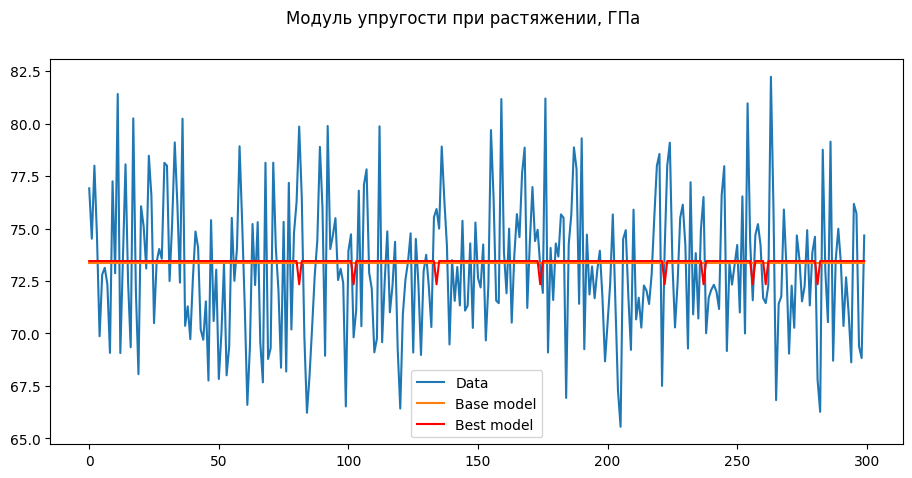

In [ ]:
# визуализируем для оценки качества базовой и лучшей модели
fig, ax = plt.subplots(figsize=(11, 5))
ax.plot(y1_test, label='Data')
ax.plot(y1_prediction_base, label='Base model')
ax.plot(y1_prediction_best, label='Best model',  color = 'r')
fig.suptitle('Модуль упругости при растяжении, ГПа')
ax.legend()
plt.show()

In [ ]:
# Сравним предсказания для базовой и лучшей модели на тестовом наборе данных
print('Модуль упругости при растяжении, ГПа')
compare_test1 = modelget_metrics ('Базовая модель', y1_test, y1_prediction_base)
compare_test1 = compare_test1.append(modelget_metrics('Лучшая модель (Дерево решений)', y1_test, y1_prediction_best))
compare_test1.style.highlight_max(axis=0)

Модуль упругости при растяжении, ГПа


<ipython-input-101-71f8850c01da>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_test1 = compare_test1.append(modelget_metrics('Лучшая модель (Дерево решений)', y1_test, y1_prediction_best))


,R2,RMSE,MAE,MAPE,max_error
Базовая модель,-0.002552,-3.290204,-2.655505,-0.036362,-8.869620
Лучшая модель (Дерево решений),-0.008675,-3.300236,-2.665111,-0.036518,-8.782905


# **Модель для прочности при растяжении, МПа**

In [ ]:
df


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
1,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
2,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
3,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,60.000000
4,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1,9.076380,47.019770
996,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1,10.565614,53.750790
997,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1,4.161154,67.629684
998,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1,6.313201,58.261074


In [ ]:
# выделяем предикторы и целевую переменную для Задачи 2
y2_columns = ['Прочность при растяжении, МПа']
x2_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [ ]:
y2 = df.loc[:, y2_columns]
x2 = df.loc[:, x2_columns]

In [ ]:
# Разделяем на тренировочную и тестовую выборку
x2_train_raw, x2_test_raw, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=48)
print('x2_train:', x2_train_raw.shape, 'y2_train:', y2_train.shape)
print('x2_test:', x2_test_raw.shape, 'y2_test:', y2_test.shape)

x2_train: (700, 11) y2_train: (700, 1)
x2_test: (300, 11) y2_test: (300, 1)


In [ ]:
# препроцессинг входных переменных
scaler = StandardScaler()
scaled2 = ColumnTransformer(transformers=[('scaler', scaler, x2_columns)])
x2_train = scaled2.fit_transform(x2_train_raw)
x2_test = scaled2.transform(x2_test_raw)

In [ ]:
# массивы y_train и y_test не преобразуются
y2_train = y2_train['Прочность при растяжении, МПа'].values
y2_test = y2_test['Прочность при растяжении, МПа'].values

In [ ]:
# описательная статистика до стандартизации
x2_train_raw.describe().loc[['min', 'max', 'mean', 'std'], :].style\
    .set_table_styles([{'selector': 'th.col_heading',
                        'props': [('text-align', 'left')]}])\
    .set_properties(**{'text-align': 'left'})\
    .format('{:.3f}')

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
min,0.389,1784.482,9.986,29.956,15.696,173.485,1.668,41.048,0.000,0.145,20.572
max,5.592,2192.739,1649.416,192.852,28.955,396.898,1238.476,386.903,1.000,14.376,89.877
mean,2.926,1972.982,744.270,110.904,22.222,284.521,472.354,216.613,0.507,6.987,57.163
std,0.923,73.205,324.405,27.272,2.366,40.015,278.013,57.620,0.500,2.558,11.752


In [ ]:
# после препроцессинга
pd.DataFrame(x2_train, columns=x1_columns).describe().loc[['min', 'max', 'mean', 'std'], :].style\
    .set_table_styles([{'selector': 'th.col_heading',
                        'props': [('text-align', 'left')]}])\
    .set_properties(**{'text-align': 'left'})\
    .format('{:.3f}')

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
min,-2.750,-2.577,-2.265,-2.970,-2.760,-2.777,-1.694,-3.049,-1.014,-2.676,-3.116
max,2.890,3.004,2.792,3.007,2.848,2.810,2.758,2.958,0.986,2.890,2.786
mean,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001


In [ ]:
# Сравним что получим от моделей с параметрами по умолчанию (2)
# получим данные в виде таблицы с метриками каждой модели
# Список с названиями моделей и объектами моделей
print('Прочность при растяжении, МПа')
def_models_raw_2 = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'Lasso': Lasso(),                                                           # лассо
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=43),            # деревья решений
    'SVR': SVR(),                                                               # метод опорных векторов
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=43)     # градиентный бустинг
    }

model_stats_2 = evaluate_models(def_models_raw_2, x2_train, y2_train)
model_stats_2.T.style.highlight_max(axis=1) 

Прочность при растяжении, МПа


,R2,RMSE,MAE,MAPE,max_error
DummyRegressor,-0.022646,-485.766658,-380.550456,-0.168633,-1267.370957
Lasso,-0.038292,-488.696718,-385.230924,-0.170347,-1272.027386
DecisionTreeRegressor,-1.154126,-699.859479,-553.085798,-0.240743,-1905.650070
SVR,-0.022372,-485.698613,-380.578720,-0.168202,-1268.151424
GradientBoostingRegressor,-0.114121,-506.607014,-403.137241,-0.177888,-1328.962027


К сожалению, положительным коэффициент детерменации **R2** ни на одной модели не получили. Близко к нулю только на линейных моделях **Lasso**

Где-то рядом с линейными моделями Метод опорных векторов **SVR** по метрике **R2**.
Но другие метрики близки к базовой модели.

Метрики **MAPE** также не дали ожидаемых результатов, ближе к 0 на линейных моделях. 

Хуже проявили себя метрики модели градиентный бустинг **GradientBoostingRegressor**



Подберём параметры кросс-валидации 

In [ ]:
search_models2 = {}

In [ ]:
# Подбираем коэффициенты для модели Lasso 'Прочность при растяжении, МПа'
#
# alpha, default=1.0
# Constant that multiplies the L1 term

params2 = [
  {
    'alpha': [ 1, 4, 10, 15]
  }
]
search, smodel = run_grids_params (Lasso(), params2, x2_train, y2_train )
search_models2[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
3,{'alpha': 15},-381.563227,1


In [ ]:
# подбор гиперпараметров для модели DecisionTreeRegressor 'Прочность при растяжении, МПа'
#
# criterion {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}
# The function to measure the quality of a split.
#
# splitter{“best”, “random”}
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [ ]:
params2 = {
    'random_state': [43],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 5, 3],
    'max_features': range(4, 10)
}
search, smodel = run_grids_params(DecisionTreeRegressor(), params2, x2_train, y2_train)
search_models2[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
1,"{'criterion': 'squared_error', 'max_depth': 1, 'max_features': 4, 'random_state': 43, 'splitter': 'random'}",-378.711689,1
37,"{'criterion': 'friedman_mse', 'max_depth': 1, 'max_features': 4, 'random_state': 43, 'splitter': 'random'}",-378.711689,1
109,"{'criterion': 'poisson', 'max_depth': 1, 'max_features': 4, 'random_state': 43, 'splitter': 'random'}",-378.711689,1


In [ ]:
#параметры кросс-валидации для модели GradientBoostingRegressor 'Прочность при растяжении, МПа'
#
# n_estimators
# The number of boosting stages to perform
#
# loss {‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}
# Loss function to be optimized
#
# criterion{‘friedman_mse’, ‘squared_error’, ‘mse’, ‘mae’}
# The function to measure the quality of a split
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [ ]:
params2 = {
    'random_state': [48],
    'loss': ['squared_error', 'absolute_error'], 
    #'criterion': ['friedman_mse', 'squared_error'],
    'n_estimators': [1, 50, 100],
    'max_depth': [1, 2, 6],
    'max_features': [1, 5, 11]    
}
search, smodel = run_grids_params(GradientBoostingRegressor(), params2, x2_train, y2_train)
search_models2[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
39,"{'loss': 'absolute_error', 'max_depth': 2, 'max_features': 5, 'n_estimators': 1, 'random_state': 48}",-380.062634,1


In [ ]:
# Сравнение моделей с подобранными гиперпараметрами 'Прочность при растяжении, МПа'
# какая модель в итоге по кросс-валидации лучше

model_stats_2 = evaluate_models(search_models2, x2_train, y2_train)
model_stats_2.T.style.highlight_max(axis=0)

,R2,RMSE,MAE,MAPE,max_error
"DecisionTreeRegressor(max_depth=1, max_features=4, random_state=43, splitter='random')",-0.017023,-484.503414,-378.711689,-0.167910,-1262.611688
"GradientBoostingRegressor(loss='absolute_error', max_depth=2, max_features=5, n_estimators=1, random_state=48)",-0.021626,-485.544403,-380.062634,-0.168006,-1269.547660


Модель с Деревьями решений при подборе гиперпараметров показала метрики лучше, чем при параметрaх по умолчанию. 

В целом, метрики близки к базовой модели.
Сравнительно лучший результат для коэффициента детерминации R2 наиболее близкий к 0.

In [ ]:
# Предсказание базовой модели для Прочности при растяжении, МПа
base_model2 = DummyRegressor(strategy='mean')
base_model2.fit(x2_train, y2_train)
y2_prediction_base = base_model2.predict(x2_test)

# Предсказание лучшей модели для Прочности при растяжении, МПа
best_model2 = DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=5, random_state=48, splitter='random')
best_model2.fit(x2_train, y2_train)
y2_prediction_best = best_model2.predict(x2_test)

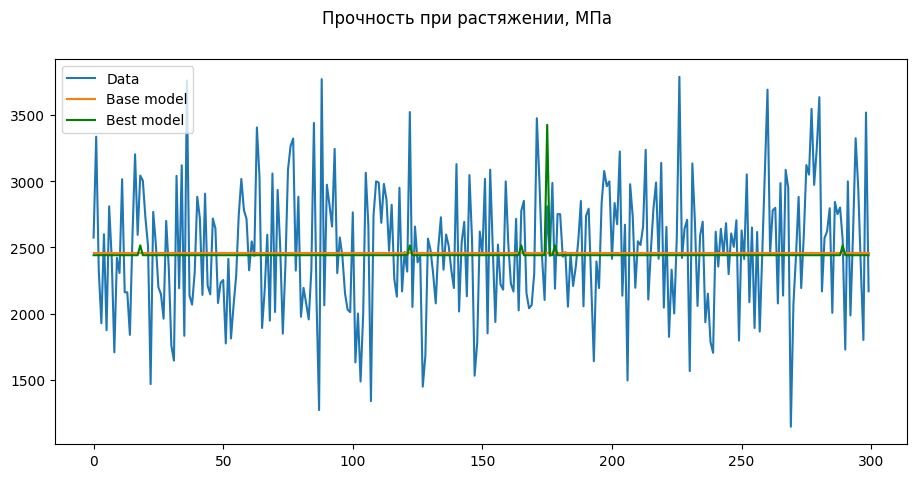

In [ ]:
# визуализируем для оценки качества базовой и лучшей модели
fig, ax = plt.subplots(figsize=(11, 5))
ax.plot(y2_test, label='Data')
ax.plot(y2_prediction_base, label='Base model')
ax.plot(y2_prediction_best, label='Best model',  color = 'g')
fig.suptitle('Прочность при растяжении, МПа')
ax.legend()
plt.show()

Результаты далеки от исходных данных, получить пригодную модель не удалось. Слишком длительный и кропотливый процесс - подбор гиперпараметров

In [ ]:
# Сравним предсказания для базовой и лучшей модели на тестовом наборе данных
print('Прочность при растяжении, МПа')
compare_test2 = modelget_metrics ('Базовая модель', y2_test, y2_prediction_base)
compare_test2 = compare_test2.append(modelget_metrics('Лучшая модель (Дерево решений)', y2_test, y2_prediction_best))
compare_test2.style.highlight_max(axis=0)

Прочность при растяжении, МПа


<ipython-input-148-6c82b996b317>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_test2 = compare_test2.append(modelget_metrics('Лучшая модель (Дерево решений)', y2_test, y2_prediction_best))


,R2,RMSE,MAE,MAPE,max_error
Базовая модель,-0.005353,-482.178099,-388.112377,-0.165765,-1336.763771
Лучшая модель (Дерево решений),-0.009934,-483.275513,-389.052350,-0.165298,-1349.882778


Хотя бы на сотые доли отрицательные значения коэффициента детерминации